# Importing the data - Obtain step

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


1. id - unique identified for a house
2. Date - house was sold
3. Price - is prediction target
4. bedroomsNumber - of Bedrooms/House
5. bathroomsNumber - of bathrooms/bedrooms
6. sqft_livingsquare - footage of the home
7. sqft_lotsquare - footage of the lot
8. floorsTotal - floors (levels) in house
9. waterfront - House which has a view to a waterfront
10. view - Has been viewed
11. condition - How good the condition is ( Overall )
12. grade - overall grade given to the housing unit, based on King County grading system
13. sqft_above - square footage of house apart from basement
14. sqft_basement - square footage of the basement
15. yr_built - Built Year
16. yr_renovated - Year when house was renovated
17. zipcode - zip
18. lat - Latitude coordinate
19. long - Longitude coordinate
20. sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
21. sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

# Scrubbing the data 

## Cleaning based on info

Key observations from here:

1. Datatype of date: String
2. Waterfront is missing values
3. Sqft_basement has a datatype of object
4. yr_renovbated missing values
5. yr_renovated is float

### Dealing with the date column

In [3]:
df.date.value_counts()

6/23/2014    142
6/26/2014    131
6/25/2014    131
7/8/2014     127
4/27/2015    126
            ... 
1/31/2015      1
7/27/2014      1
5/27/2015      1
8/30/2014      1
2/15/2015      1
Name: date, Length: 372, dtype: int64

By looking at the most common values in the Date column, we see that houses seem to sold more in late spring and early summer. Lets take another look at this and see if we can extract the month in any way.

<AxesSubplot:xlabel='date', ylabel='price'>

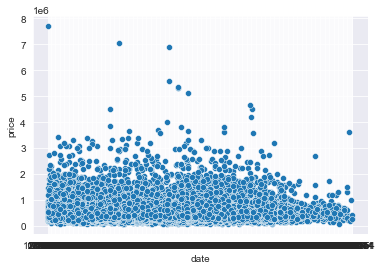

In [4]:
sns.scatterplot(x = "date", y = "price", data = df)

In [5]:
df['month'] = pd.to_datetime(df['date']).dt.month

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

<AxesSubplot:xlabel='month', ylabel='count'>

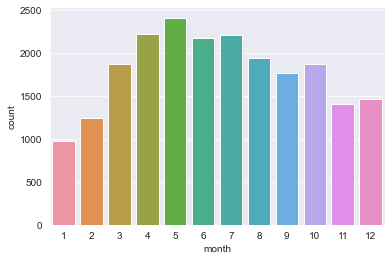

In [7]:
sns.countplot(x = "month", data = df)

So there appears to be certain months where more houses are sold. Lets take a look at the avg price of the homes during each month to see if there is any significant change by waiting to sell a house in the summer months.

<AxesSubplot:xlabel='month', ylabel='price'>

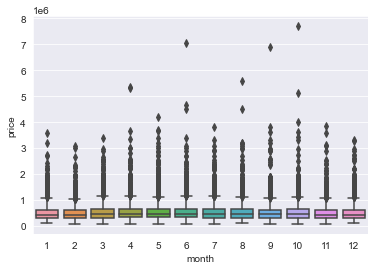

In [8]:
sns.boxplot(x = "month", y = "price", data = df)

<AxesSubplot:xlabel='month', ylabel='price'>

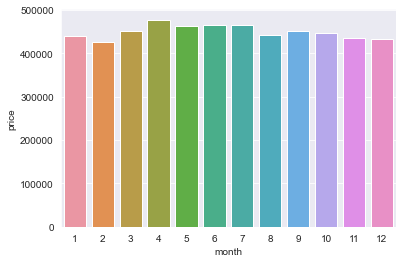

In [9]:
sns.barplot(x = "month", y = "price", data = df.groupby("month").median().reset_index())

In [10]:
df.groupby("month").median()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
month,,,,,,,,,,,,,,,,,,,
1,3.905036e+09,438500.0,3.0,2.25,1890.0,7800.0,1.0,0.0,0.0,3.0,7.0,1570.0,1974.0,0.0,98065.0,47.55950,-122.2310,1800.0,7700.0
2,3.997500e+09,426500.0,3.0,2.00,1830.0,7667.0,1.0,0.0,0.0,3.0,7.0,1489.0,1974.0,0.0,98059.0,47.56120,-122.2290,1800.0,7638.0
3,3.905040e+09,450000.0,3.0,2.25,1870.0,7560.0,1.0,0.0,0.0,3.0,7.0,1540.0,1973.0,0.0,98065.0,47.56480,-122.2260,1820.0,7647.0
4,4.022900e+09,477000.0,3.0,2.25,1900.0,7500.0,1.5,0.0,0.0,3.0,7.0,1540.0,1976.0,0.0,98072.0,47.56860,-122.2290,1840.0,7560.0
5,3.905005e+09,462000.0,3.0,2.25,1930.0,7498.0,1.0,0.0,0.0,3.0,7.0,1540.0,1974.0,0.0,98072.0,47.57870,-122.2365,1840.0,7551.5
6,3.904925e+09,465000.0,3.0,2.25,1980.0,7700.0,1.5,0.0,0.0,3.0,8.0,1600.0,1975.0,0.0,98072.0,47.57605,-122.2290,1890.0,7720.0
7,3.885801e+09,465000.0,3.0,2.25,1950.0,7695.0,1.5,0.0,0.0,3.0,8.0,1610.0,1977.0,0.0,98059.0,47.57400,-122.2150,1870.0,7650.0
8,4.016800e+09,442200.0,3.0,2.25,1940.0,7810.0,1.0,0.0,0.0,3.0,7.0,1590.0,1976.0,0.0,98059.0,47.57720,-122.2220,1860.0,7755.0
9,3.826501e+09,450000.0,3.0,2.25,1920.0,7620.0,1.5,0.0,0.0,3.0,7.0,1580.0,1974.0,0.0,98065.0,47.57400,-122.2350,1830.0,7503.0


Price of the same avg house changes by about $30k if you wait to see in the summer months. At this point it becomes clear that the month feature gives us a lot more information than the actual date. So we will be dropping date and just using the month from this point.

In [11]:
df.drop(columns=['date'], inplace=True, axis = 1)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  float64
 8   view           21534 non-null  float64
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

### Dealing with missing values in waterfront

In [13]:
df.waterfront.value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [14]:
146/19200 * 100

0.7604166666666667

In [15]:
df.isna().sum()

id                  0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
month               0
dtype: int64

About 2300 values missing from waterfront, but we only have 146 houses with a waterfront. We need to explore whether we even need to include this variable. Lets check the avg prices of homes with a waterfront vs ones without a waterfront

<AxesSubplot:xlabel='waterfront', ylabel='price'>

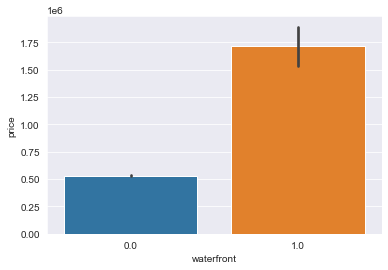

In [16]:
sns.barplot(x = "waterfront", y = "price", data = df)

<AxesSubplot:xlabel='long', ylabel='lat'>

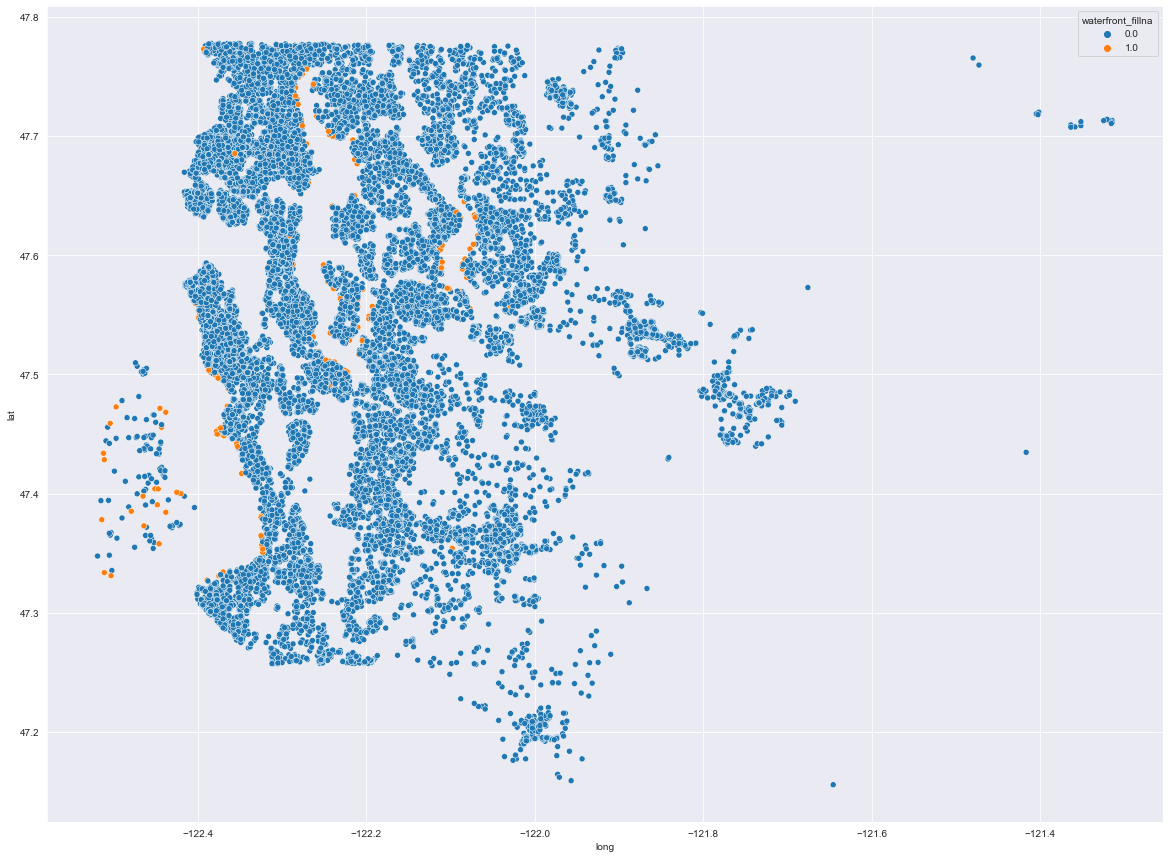

In [25]:
plt.figure(figsize=(20, 15))
sns.scatterplot(x = "long", y = "lat", hue = "waterfront",  data = df)

We are going to keep the waterfront variable and replicate the existing distribution to fill in the missing data. 

In [21]:
s = df.waterfront.value_counts(normalize=True)
df['waterfront_fillna'] = df['waterfront']
df.loc[df.waterfront.isna(), 'waterfront_fillna'] = np.random.choice(s.index, p=s.values, size=df.waterfront.isna().sum())

In [23]:
df['waterfront_fillna'].value_counts(normalize = True)

0.0    0.992499
1.0    0.007501
Name: waterfront_fillna, dtype: float64

Now that we replicated the existing distribution of waterfront, we can drop the original column and rename the new one accordingly.

In [27]:
df.drop(columns=['waterfront'], axis = 1, inplace = True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 21597 non-null  int64  
 1   price              21597 non-null  float64
 2   bedrooms           21597 non-null  int64  
 3   bathrooms          21597 non-null  float64
 4   sqft_living        21597 non-null  int64  
 5   sqft_lot           21597 non-null  int64  
 6   floors             21597 non-null  float64
 7   view               21534 non-null  float64
 8   condition          21597 non-null  int64  
 9   grade              21597 non-null  int64  
 10  sqft_above         21597 non-null  int64  
 11  sqft_basement      21597 non-null  object 
 12  yr_built           21597 non-null  int64  
 13  yr_renovated       17755 non-null  float64
 14  zipcode            21597 non-null  int64  
 15  lat                21597 non-null  float64
 16  long               215

In [29]:
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'month', 'waterfront_fillna'],
      dtype='object')

In [30]:
df.columns = ['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'month', 'waterfront']

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   view           21534 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  object 
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   17755 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  int64  
 18  sqft_l

In [ ]:
df.grade.value_counts(normalize = True)

In [ ]:
bins = [5, 7, 13]
bins_grd = pd.cut(df['grade'], bins)
bins_grd = bins_grd.cat.as_ordered()
bins_grd.head()

In [ ]:
df.head()

In [ ]:
sns.scatterplot(df.long, df.lat, hue = df.price)

In [ ]:
df.hist(figsize = (15,15))

In [ ]:
df.loc[df.yr_renovated > 0, "has_renovation"] = 1

In [ ]:
df[df.yr_renovated == 1980]